In [4]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

In [3]:
from thefuzz import fuzz
import skfuzzy as fuzz

/usr/local/lib/python3.7/dist-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [1]:
pip install thefuzz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=40e5edd2cb278cbc4e83b6341b414772e955108702d4110c6f847ab929719b1c
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [12]:
IPK = ctrl.Antecedent(np.arange(0, 4.0, 1), 'IPK Mahasiswa')
Perilaku = ctrl.Antecedent(np.arange(0, 86, 1), 'Tingkat Perilaku Mahasiswa')
Prestasi = ctrl.Consequent(np.arange(0, 101, 1), 'Prestasi Mahasiswa')

In [14]:
IPK['sedang'] = fuzz.trapmf(IPK.universe, [0, 0, 2.75, 3.5])
IPK['tinggi'] = fuzz.trapmf(IPK.universe, [2.75, 3.125, 3.5, 3.5])

In [19]:
Perilaku['rendah'] = fuzz.trapmf(Perilaku.universe, [0, 0, 50, 85])
Perilaku['tinggi'] = fuzz.trapmf(Perilaku.universe, [50, 67.5, 85, 85])

In [20]:
Prestasi['mengecewakan'] = fuzz.trimf(Prestasi.universe, [0, 37.5, 75])
Prestasi['memuaskan'] = fuzz.trimf(Prestasi.universe, [50, 75, 100])

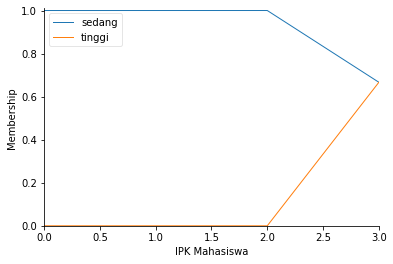

In [15]:
IPK.view()

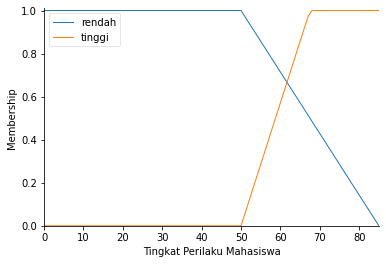

In [10]:
Perilaku.view()

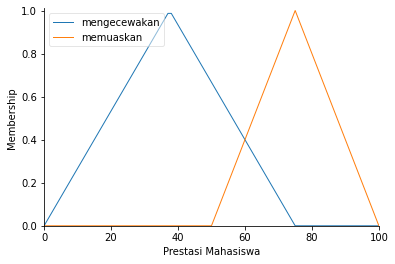

In [11]:
Prestasi.view()

In [22]:
rule1 = ctrl.Rule(IPK['tinggi'] & Perilaku['tinggi'], Prestasi['memuaskan'])
rule2 = ctrl.Rule(IPK['sedang'] & Perilaku['rendah'], Prestasi['mengecewakan'])
rule3 = ctrl.Rule(IPK['sedang'] & Perilaku['tinggi'], Prestasi['memuaskan'])

In [23]:
Prestasi_ctrl = ctrl.ControlSystem([rule1, rule2,rule3])

In [24]:
prestasi_mahasiswa = ctrl.ControlSystemSimulation(Prestasi_ctrl)

In [25]:
prestasi_mahasiswa.input['IPK Mahasiswa'] = 2.9
prestasi_mahasiswa.input['Tingkat Perilaku Mahasiswa'] = 70
prestasi_mahasiswa.compute()

54.52801834934945


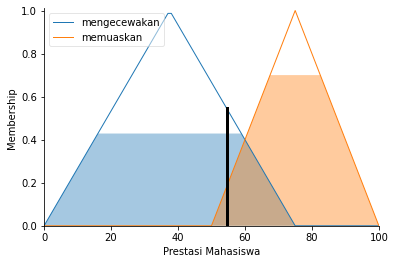

In [27]:
print(prestasi_mahasiswa.output['Prestasi Mahasiswa'])
Prestasi.view(sim=prestasi_mahasiswa)